### Importing Libraries and Functions

- numpy: for handling large, multi-dimensional arrays and mathematical functions on arrays
- Keras: for building and training our deep learning models
- mnist: MNIST dataset of handwritten digits (grayscale values of 28x28 pixel images stored as arrays with their corresponding labels)
- matplotlib: for creating static, interactive, and animated plots of our data and models
- to_categorical: for encoding data (in our case, output labels)

In [149]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

### Loading and Characterizing Dataset

#### Describing our training and test data

- train_images: NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
- train_labels: NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
- test_images: NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
- test_labels: NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [150]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"training set: {train_images.shape, train_labels.shape}")
print(f"test set: {test_images.shape, test_labels.shape}")

training set: ((60000, 28, 28), (60000,))
test set: ((10000, 28, 28), (10000,))


#### Example of 1 Training Instance

- train_images[0] is the first data point in our training set. This point has a 28x28 NumPy array, where each element is a grayscale value for its corresponding pixel. There are 60000 more data points in our set
- train_labels[0] is the corresponding label of our first data point. Each of the 60000 data points in our training set has a corresponding label. 

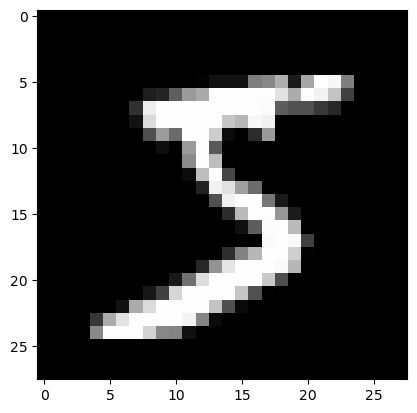

Corresponding label: 5


In [151]:
plt.imshow(train_images[0], cmap = 'gray')
plt.show()
print(f"Corresponding label: {train_labels[0]}")

### Data Normalization

- Each data point's 28x28 array contains grayscale values between 0 and 255.
- We divide each of these values by 255 to adjust the range of values to [0,1]

In [152]:
train_images = train_images / 255
test_images = test_images / 255

### Label Encoding

- Training and test labels are one-hot encoded
- Ex: if training_labels[0] is originally 5, it will now be encoded to [0, 0, 0, 0, 0, 1, 0, 0, 0 ,0]

In [153]:
encoded_train_labels = to_categorical(train_labels, 10)
encoded_test_labels = to_categorical(test_labels, 10)

### Flattening Our Training Data Input Vector

In [154]:
num_training_samples, image_pixel_rows, image_pixel_columns = train_images.shape
train_images = train_images.reshape(num_training_samples, image_pixel_rows * image_pixel_columns)

### Defining NN Model

In [155]:
model = Sequential([
    Input(shape=(image_pixel_rows * image_pixel_columns,)), 
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

### Model Training

In [156]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy')

In [157]:
model.fit(train_images, encoded_train_labels, epochs = 8, batch_size = 32)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5394
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1672
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1317
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1127
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0968
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0852
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0770
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0741


### Flattening Our Testing Data Input Vector

In [158]:
num_testing_samples, _, _ = test_images.shape
test_images = test_images.reshape(num_testing_samples, image_pixel_rows * image_pixel_columns)

### Evaluating Model Performance on Test Data

In [159]:
evaluation = model.evaluate(test_images, encoded_test_labels)
print(evaluation)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.1000
0.08083915710449219


### Using Learned Model to Predict the First 20 Test Samples

In [160]:
predictions = model.predict(test_images[:20,:])
predictions_indices = predictions.argmax(1)

print(f"Predictions for first 20 test points: {predictions_indices}")
print(f"Real labels for first 20 test points: {test_labels[:20]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictions for first 20 test points: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Real labels for first 20 test points: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
